In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv('/workspace/code/bait_news_gen/data/Fake/tfidf_full_full_all/filtered/fake_top3_1.0.csv')
len(df)

131999

In [53]:
df['BERTScore'].describe()

count    131999.000000
mean          0.928526
std           0.015578
min           0.816958
25%           0.919810
50%           0.929679
75%           0.938405
max           0.999384
Name: BERTScore, dtype: float64

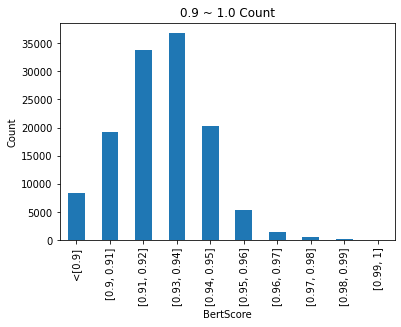

In [54]:
# 구간별 count 계산
bins = [0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]
labels = ['<[0.9]','[0.9, 0.91]', '[0.91, 0.92]', '[0.93, 0.94]', '[0.94, 0.95]','[0.95, 0.96]', '[0.96, 0.97]', '[0.97, 0.98]', '[0.98, 0.99]', '[0.99, 1]']
df['bin'] = pd.cut(df['BERTScore'], bins=bins, labels=labels, right=False, include_lowest=True)
counts = df['bin'].value_counts().sort_index()

# barplot 생성
counts.plot(kind='bar')
plt.xlabel('BertScore')
plt.ylabel('Count')
plt.title('0.9 ~ 1.0 Count')
plt.show()

In [55]:
counts

<[0.9]           8454
[0.9, 0.91]     19164
[0.91, 0.92]    33781
[0.93, 0.94]    36798
[0.94, 0.95]    20221
[0.95, 0.96]     5408
[0.96, 0.97]     1505
[0.97, 0.98]      530
[0.98, 0.99]      199
[0.99, 1]          60
Name: bin, dtype: int64

In [57]:
df['category'].unique()

array(['PO', 'IS', 'EC', 'SO', 'LC', 'GB', 'ET'], dtype=object)

In [61]:
df[df['bin']=='[0.98, 0.99]'].value_counts()

ET    148
LC     25
EC     15
IS      6
SO      3
GB      2
Name: category, dtype: int64

In [64]:
index = (df['category'] =='ET') & (df['bin']=='[0.98, 0.99]')
df[index].head()

,news_id,original_title,content,sim_news_id,bait_title,category,label,bait_content,BERTScore,bin
1806,ET_M03_037031,"SMAP 해체설… \""기무라 타쿠야만 남고 초난강 외 3명 소속사 떠나\""",SMAP 해체설 기무라 타쿠야 초난강 일본의 인기 그룹 ‘스맙(SMAP)’의 해체설...,ET_M03_037029,"SMAP 해체설…\""기무라 타쿠야만 남고 초난강 외 3명은 소속사 떠나\""",ET,0,SMAP 해체설 기무라 타쿠야 초난강 일본의 인기 그룹 ‘스맙(SMAP)’의 해체설...,0.987631,"[0.98, 0.99]"
3372,ET_M03_281300,"'부탁해요 엄마' 민아, 최태준의 결혼 여부 알아챘다 … 운명의 장난?",'부탁해요 엄마' 민아 '부탁해요 엄마'에서 민아가 최태준이 결혼한 사실을 알았다....,ET_M03_281317,"'부탁해요 엄마' 민아, 최태준의 결혼 사실 알아버려 … 운명의 장난",ET,0,'부탁해요 엄마' 민아 '부탁해요 엄마'에서 민아가 최태준이 결혼한 사실을 알았다....,0.981007,"[0.98, 0.99]"
4515,ET_M03_279210,"\""라디오스타\"" 박소담, '사도' 촬영 중 실제로 맞아 멍들어",박소담 라디오스타 배우 박소담이 MBC '라디오스타'에 출연하여 화제가 되고 있다....,ET_M03_279180,"\""라디오스타\"" 박소담, '사도' 촬영 중에 실제로 맞아 멍든 경험",ET,0,박소담 라디오스타 배우 박소담이 MBC '라디오스타'에 출연하여 화제가 되고 있다....,0.983672,"[0.98, 0.99]"
5240,ET_M03_280208,"'마리와 나' 강호동 서인국, 도도한 고양이에 \""우울증 걸릴것 같다\""","사진 JTBC 강호동 서인국, '마리와 나' 도도한 고양이에 \""우울증 걸릴것 같다...",ET_M03_280187,"강호동 서인국, '마리와 나' 도도한 고양이에 \""우울증 걸릴것 같다\""",ET,0,"사진 JTBC 강호동 서인국, '마리와 나' 도도한 고양이에 \""우울증 걸릴것 같다...",0.987734,"[0.98, 0.99]"
5862,ET_M03_279457,"김광진 의원실 \""'응답하라 1988' 류준열 결혼식 올리는 중\""…스포 공개 '헉'",더불어민주당 소속 김광진 의원실이 ‘응답하라 1988’의 핵심 ‘남편 찾기’와 관련...,ET_M03_279540,"김광진 의원실 \""'응답하라 1988' 류준열 결혼식 올리는 중\""…스포 논란",ET,0,더불어민주당 소속 김광진 의원실이 ‘응답하라 1988’의 핵심 ‘남편 찾기’와 관련...,0.988083,"[0.98, 0.99]"


In [66]:
df[df['bin']=='[0.98, 0.99]'][['original_title','bait_title','BERTScore']].head() #[['original_title','bait_title','BERTScore']]

,original_title,bait_title,BERTScore
1806,"SMAP 해체설… \""기무라 타쿠야만 남고 초난강 외 3명 소속사 떠나\""","SMAP 해체설…\""기무라 타쿠야만 남고 초난강 외 3명은 소속사 떠나\""",0.987631
3372,"'부탁해요 엄마' 민아, 최태준의 결혼 여부 알아챘다 … 운명의 장난?","'부탁해요 엄마' 민아, 최태준의 결혼 사실 알아버려 … 운명의 장난",0.981007
4515,"\""라디오스타\"" 박소담, '사도' 촬영 중 실제로 맞아 멍들어","\""라디오스타\"" 박소담, '사도' 촬영 중에 실제로 맞아 멍든 경험",0.983672
5240,"'마리와 나' 강호동 서인국, 도도한 고양이에 \""우울증 걸릴것 같다\""","강호동 서인국, '마리와 나' 도도한 고양이에 \""우울증 걸릴것 같다\""",0.987734
5862,"김광진 의원실 \""'응답하라 1988' 류준열 결혼식 올리는 중\""…스포 공개 '헉'","김광진 의원실 \""'응답하라 1988' 류준열 결혼식 올리는 중\""…스포 논란",0.988083
